In [1]:
from travel_intelligence.TIAPICommunicator import TIAPICommunicator

In [2]:
comm = TIAPICommunicator("https://api.travel-intelligence.com/")

In [3]:
import jupyterviz

In [4]:
jupyterviz.secretInput("password")

In [5]:
comm.start_Session("sebastien.perez@amadeus.com",password)

https://api.travel-intelligence.com/api/v1/session
TobJT5DKPuPHhZMPYey9


In [6]:
params = dict(market="FR",onds="*-*")
evolution = comm.accessService("ti-search/api/v2/ss_time_evolutions",None,params)

https://api.travel-intelligence.com/ti-search/api/v2/ss_time_evolutions?onds=%2A-%2A&market=FR


In [7]:
jupyterviz.viz(type="json",data=evolution)

In [8]:
x = [e[0] for e in evolution["ss_time_evolutions"][0]["time_evolution"]]

In [9]:
import numpy as np
x = np.array(map(lambda e: np.array(e.split("-")).astype(int),x ))

In [10]:
x[-5:]

array([[2016,   12,   15],
       [2016,   12,   16],
       [2016,   12,   17],
       [2016,   12,   18],
       [2016,   12,   19]])

In [11]:
y = np.array([e[1] for e in evolution["ss_time_evolutions"][0]["time_evolution"]])

In [12]:
y[:5]

array([1913874, 2756039, 3094963, 3119404, 3018401])

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
x = x[-600:]
y = y[-600:]
x_i = x[:-20]
y_i = y[:-20]

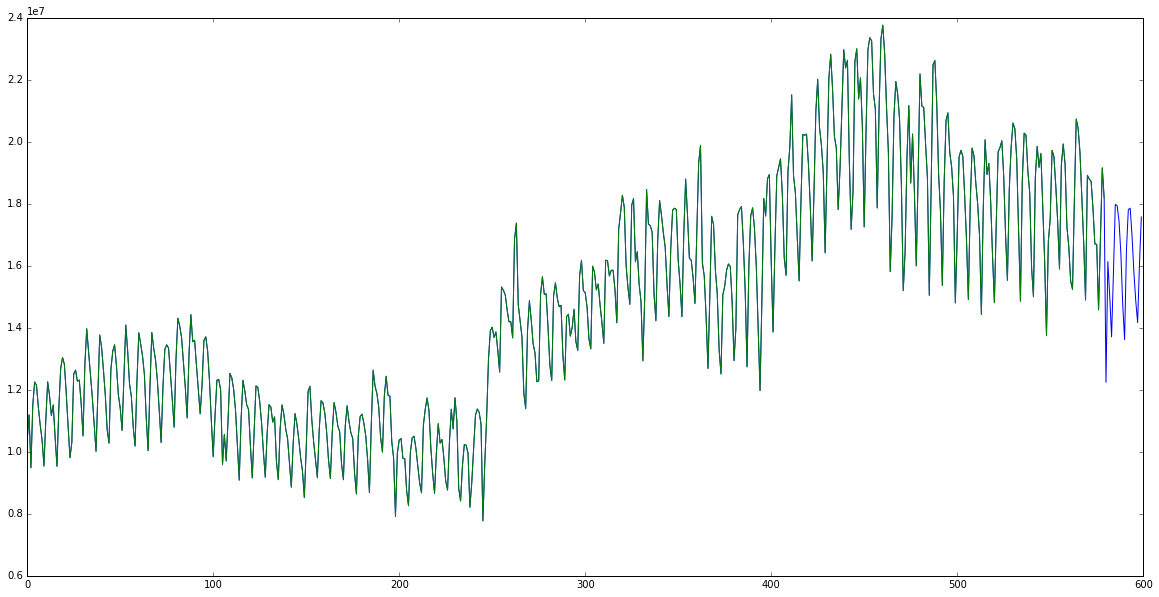

In [15]:
plt.figure(figsize=(20,10))
plt.plot(y)
plt.plot(y_i)
plt.show()

In [16]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_i, y_i,train_size=0.75, test_size=.25)

In [18]:
tpot = TPOTRegressor(verbosity=3,generations=2,population_size=5)

In [19]:
tpot.fit(x_train,y_train)

Optimization Progress:  33%|███▎      | 5/15 [00:00<00:04,  2.40pipeline/s]

Generation 1 - Current Pareto front scores:
1	4.65206868007e+12	GradientBoostingRegressor(input_matrix, 0.46000000000000002, 0.83000000000000007)
2	3.38209312608e+12	GradientBoostingRegressor(LassoLarsCV(input_matrix, False), 0.91000000000000003, 9.9999999999999995e-07)



Optimization Progress:  60%|██████    | 9/15 [00:00<00:02,  2.99pipeline/s]

Generation 2 - Current Pareto front scores:
1	4.65206868007e+12	GradientBoostingRegressor(input_matrix, 0.46000000000000002, 0.83000000000000007)
2	3.38209312608e+12	GradientBoostingRegressor(LassoLarsCV(input_matrix, False), 0.91000000000000003, 9.9999999999999995e-07)



In [20]:
tpot.score(x_test,y_test)

2527079020417.3325

In [21]:
submission = tpot.predict(x)

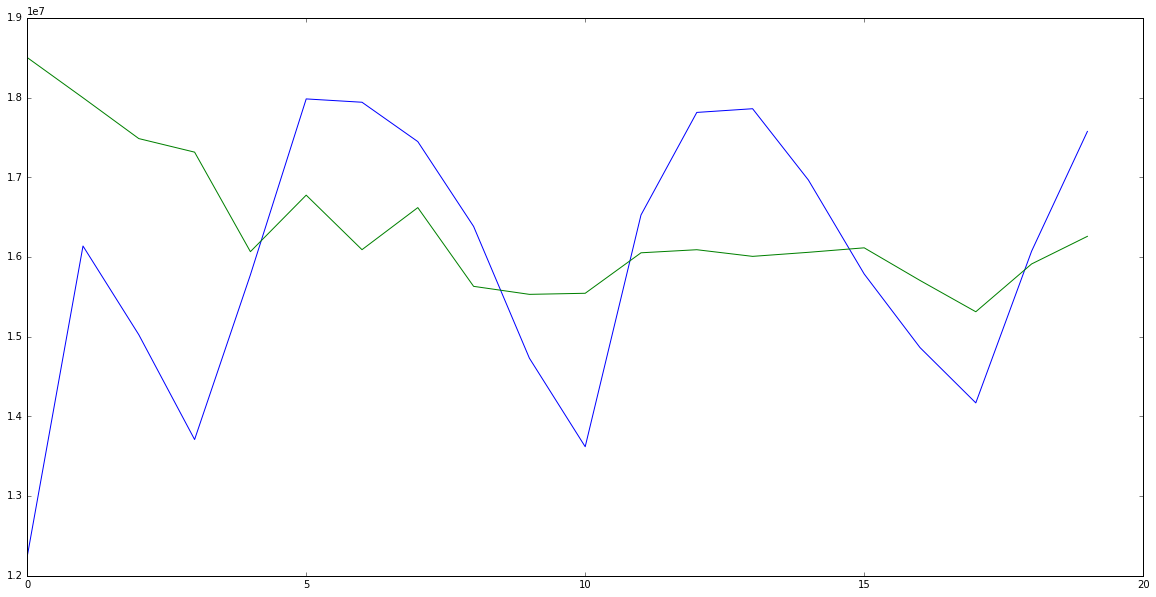

In [22]:
plt.figure(figsize=(20,10))
plt.plot(y[-20:])
plt.plot(submission[-20:])
plt.show()

In [23]:
tpot.export("searchpred.py")

In [24]:
x = [e[0] for e in evolution["ss_time_evolutions"][0]["time_evolution"]]
x = np.array(map(lambda e: np.array(e.split("-")).astype(int),x ))

In [25]:
from datetime import datetime
def getDayWeek(list):
    return np.hstack((list,[datetime(list[0],list[1],list[2]).weekday()]))

In [26]:
getDayWeek(np.array([2011,1,1]))

array([2011,    1,    1,    5])

In [27]:
x = np.array(map(getDayWeek,x))

In [28]:
x[:5]

array([[2011,    1,    1,    5],
       [2011,    1,    2,    6],
       [2011,    1,    3,    0],
       [2011,    1,    4,    1],
       [2011,    1,    5,    2]])

In [29]:
x = x[-600:]
y = y[-600:]
x_i = x[:-20]
y_i = y[:-20]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_i, y_i,train_size=0.75, test_size=.25)
tpot = TPOTRegressor(verbosity=3,generations=10,population_size=50)
tpot.fit(x_train,y_train)

Optimization Progress:   9%|▉         | 50/550 [00:00<18:25,  2.21s/pipeline]

Generation 1 - Current Pareto front scores:
1	6.11427427409e+11	XGBRegressor(input_matrix, 16, 48, 0.14999999999999999, 26.0)



Optimization Progress:  17%|█▋        | 95/550 [00:00<31:48,  4.19s/pipeline]

Generation 2 - Current Pareto front scores:
1	5.84484699832e+11	XGBRegressor(input_matrix, 39, 16, 0.089999999999999997, 0.84999999999999998)



Optimization Progress:  27%|██▋       | 147/550 [00:00<02:22,  2.82pipeline/s]

Generation 3 - Current Pareto front scores:
1	5.72825027859e+11	XGBRegressor(input_matrix, 39, 17, 0.089999999999999997, 0.84999999999999998)



Optimization Progress:  35%|███▌      | 193/550 [00:00<02:09,  2.76pipeline/s]

Generation 4 - Current Pareto front scores:
1	5.63064650116e+11	XGBRegressor(input_matrix, 90, 16, 0.029999999999999999, 0.84999999999999998)



Optimization Progress:  45%|████▍     | 245/550 [00:00<02:09,  2.36pipeline/s]

Generation 5 - Current Pareto front scores:
1	5.63064650116e+11	XGBRegressor(input_matrix, 90, 16, 0.029999999999999999, 0.84999999999999998)



Optimization Progress:  54%|█████▍    | 297/550 [00:00<01:31,  2.77pipeline/s]

Generation 6 - Current Pareto front scores:
1	5.63064650116e+11	XGBRegressor(input_matrix, 90, 16, 0.029999999999999999, 0.84999999999999998)



Optimization Progress:  63%|██████▎   | 345/550 [00:00<01:22,  2.49pipeline/s]

Generation 7 - Current Pareto front scores:
1	5.57253376192e+11	XGBRegressor(input_matrix, 90, 16, 0.040000000000000001, 0.84999999999999998)



Optimization Progress:  72%|███████▏  | 398/550 [00:00<00:57,  2.64pipeline/s]

Generation 8 - Current Pareto front scores:
1	5.54462864564e+11	XGBRegressor(CombineDFs(input_matrix, input_matrix), 90, 16, 0.040000000000000001, 0.84999999999999998)



Optimization Progress:  81%|████████  | 445/550 [00:00<00:46,  2.26pipeline/s]

Generation 9 - Current Pareto front scores:
1	5.49613551469e+11	XGBRegressor(input_matrix, 90, 9, 0.029999999999999999, 0.84999999999999998)



Optimization Progress:  90%|█████████ | 495/550 [00:00<01:38,  1.79s/pipeline]

Generation 10 - Current Pareto front scores:
1	5.49613551469e+11	XGBRegressor(input_matrix, 90, 9, 0.029999999999999999, 0.84999999999999998)



In [31]:
submission = tpot.predict(x)

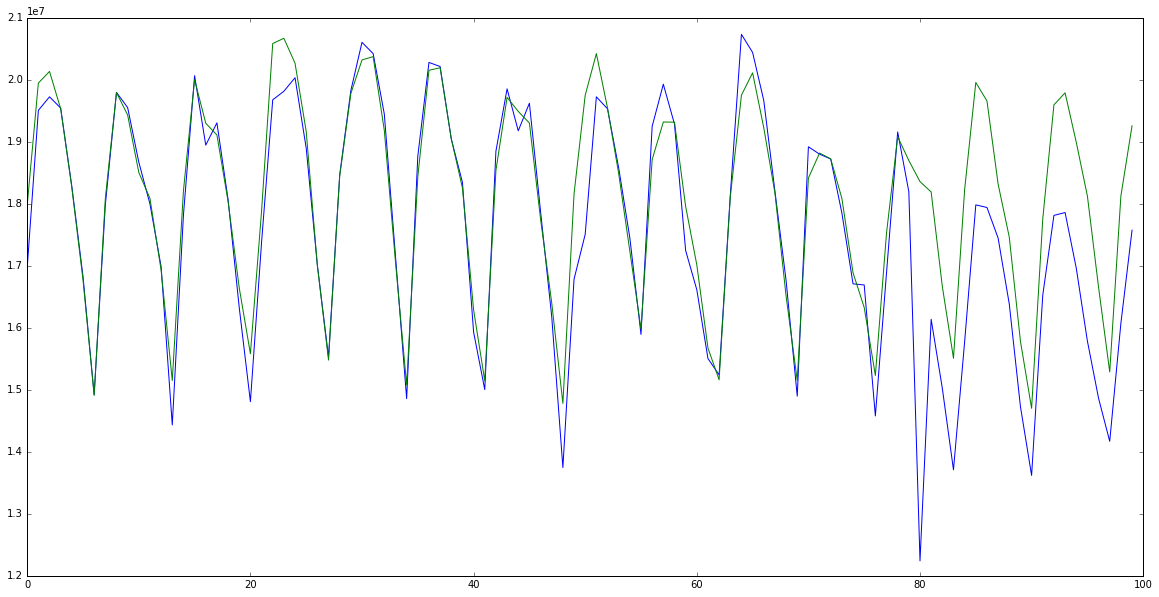

In [34]:
plt.figure(figsize=(20,10))
plt.plot(y[-100:])
plt.plot(submission[-100:])
plt.show()

In [33]:
tpot.export("searchpred.py")